In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183358,183407,183445,183572,183687,183908,184038,184224,184360,184473
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,290954,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266356,266392,266424,266445,266487,266542,266591,266654,266700,266772
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,44671,44671,45061,45061,45061,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101600,101901,101901,101901,102209,102209,102209,102209,102301,102301


In [4]:
time_idx=pd_raw.columns[4:]


In [5]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw['Country/Region']


0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [7]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country'})
pd_data_base=pd_data_base.drop(['Province/State','Lat','Long'],axis=1)

In [8]:
country_list=['Germany','India', 'US', 'Austria', 'France'] 

In [9]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

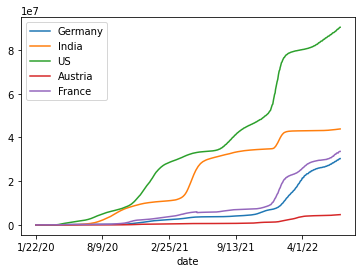

In [10]:
%matplotlib inline
df_plot.set_index('date').plot()

In [11]:
df_plot.head()

,date,Germany,India,US,Austria,France
0,1/22/20,0,0,1,0,0
1,1/23/20,0,0,1,0,0
2,1/24/20,0,0,2,0,2
3,1/25/20,0,0,2,0,3
4,1/26/20,0,0,5,0,3


In [12]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [13]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df_plot.tail(100)

,date,Germany,India,US,Austria,France
814,2022-04-15,23376879,43040947,80684528,4065438,27762686
815,2022-04-16,23416663,43042097,80696872,4075415,27874269
816,2022-04-17,23437145,43044280,80704379,4084222,27960919
817,2022-04-18,23459628,43045527,80765876,4091716,27980729
818,2022-04-19,23658211,43047594,80805187,4097345,28006219
819,2022-04-20,23844536,43049974,80874174,4103119,28162002
820,2022-04-21,24006254,43052425,80935931,4111720,28266009
821,2022-04-22,24141333,43054952,81026026,4122722,28354529
822,2022-04-23,24180512,43057545,81045774,4130862,28435100
823,2022-04-24,24200596,43060086,81059280,4137436,28494054


In [15]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)
